In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import missingno as msno
from ipywidgets import interact, Dropdown

In [2]:
current_dir = Path.cwd()
work_dir = current_dir.parent.parent
data_dir = f'{work_dir}/data'

Dataset downloaded from : https://archive.ics.uci.edu/dataset/45/heart%2Bdisease?

Source Information:
   - (a) Creators: 
       -- 1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
       -- 2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
       -- 3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
       -- 4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:
             Robert Detrano, M.D., Ph.D.
   - (b) Donor: David W. Aha (aha@ics.uci.edu) (714) 856-8779   
   - (c) Date: July, 1988


##### Datasets included in the study

- Cleveland
- Hungarian 
- Switzerland
- Long Beach


Each includes 13 features and a class label indicating the
presence and risk level of cardiovascular disease (0–4).

#####  Attribute Information

| Index | Feature Name | Description | Value Interpretation |
| :---: | :--- | :--- | :--- |
| 1 | `age` | Age in years | - |
| 2 | `sex` | Sex | `1` = Male; `0` = Female |
| 3 | `cp` | Chest pain type | `1` = Typical angina, `2` = Atypical angina, `3` = Non-anginal pain, `4` = Asymptomatic |
| 4 | `trestbps` | Resting blood pressure (mm Hg on admission) | - |
| 5 | `chol` | Serum cholestoral (mg/dl) | - |
| 6 | `fbs` | Fasting blood sugar > 120 mg/dl | `1` = True; `0` = False |
| 7 | `restecg` | Resting electrocardiographic results | `0` = Normal, `1` = ST-T wave abnormality, `2` = Probable or definite left ventricular hypertrophy |
| 8 | `thalach` | Maximum heart rate achieved | - |
| 9 | `exang` | Exercise induced angina | `1` = Yes; `0` = No |
| 10 | `oldpeak` | ST depression induced by exercise relative to rest | - |
| 11 | `slope` | The slope of the peak exercise ST segment | `1` = Upsloping, `2` = Flat, `3` = Downsloping |
| 12 | `ca` | Number of major vessels (0-3) colored by flourosopy | - |
| 13 | `thal` | Thalassemia | `3` = Normal; `6` = Fixed defect; `7` = Reversable defect |
| 14 | `num` (Target) | Diagnosis of heart disease (Angiographic status) | `0` = < 50% diameter narrowing (No disease); `1` = > 50% diameter narrowing (Disease) |

In [3]:
# Setting column names to the dataframes
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'label']
 
cleveland_data =  pd.read_csv(f'{data_dir}/downloaded/processed.cleveland.data', header=None, names=column_names)
hungarian_data =  pd.read_csv(f'{data_dir}/downloaded/processed.hungarian.data', header=None, names=column_names)
switzerland_data =  pd.read_csv(f'{data_dir}/downloaded/processed.switzerland.data', header=None, names=column_names)
longbeach_va_data =  pd.read_csv(f'{data_dir}/downloaded/processed.va.data', header=None, names=column_names)

In [4]:
print(f"cleveland:{cleveland_data.shape},  hungarian:{hungarian_data.shape}, switzerland: {switzerland_data.shape}: longbeach, {longbeach_va_data.shape}")

cleveland:(303, 14),  hungarian:(294, 14), switzerland: (123, 14): longbeach, (200, 14)


# Cleveland Dataset

In [5]:
cleveland_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
cleveland_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  label     303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
def show_description_table(df, colormap='YlGn'):
    desc = df.describe(include='all')
    styled_desc = desc.style.background_gradient(cmap=colormap)
    return styled_desc

In [8]:
show_description_table(cleveland_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303,303.000000
unique,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,5,4,nan
top,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,3.0,nan
freq,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,176,166,nan
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,nan,nan,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,nan,nan,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,nan,nan,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,nan,nan,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,nan,nan,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,nan,nan,2.000000


In [9]:
cleveland_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Hungarian Dataset

In [10]:
hungarian_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [11]:
hungarian_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    object 
 4   chol      294 non-null    object 
 5   fbs       294 non-null    object 
 6   restecg   294 non-null    object 
 7   thalach   294 non-null    object 
 8   exang     294 non-null    object 
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    object 
 11  ca        294 non-null    object 
 12  thal      294 non-null    object 
 13  label     294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [12]:
show_description_table(hungarian_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,294.000000,294.000000,294.000000,294,294,294,294,294,294,294.000000,294,294,294,294.000000
unique,nan,nan,nan,32,154,3,4,72,3,nan,4,2,4,nan
top,nan,nan,nan,120,?,0,0,150,0,nan,?,?,?,nan
freq,nan,nan,nan,65,23,266,235,29,204,nan,190,291,266,nan
mean,47.826531,0.724490,2.982993,nan,nan,nan,nan,nan,nan,0.586054,nan,nan,nan,0.360544
std,7.811812,0.447533,0.965117,nan,nan,nan,nan,nan,nan,0.908648,nan,nan,nan,0.480977
min,28.000000,0.000000,1.000000,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,0.000000
25%,42.000000,0.000000,2.000000,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,0.000000
50%,49.000000,1.000000,3.000000,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,0.000000
75%,54.000000,1.000000,4.000000,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,1.000000


In [13]:
hungarian_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    object 
 4   chol      294 non-null    object 
 5   fbs       294 non-null    object 
 6   restecg   294 non-null    object 
 7   thalach   294 non-null    object 
 8   exang     294 non-null    object 
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    object 
 11  ca        294 non-null    object 
 12  thal      294 non-null    object 
 13  label     294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


# Switzerland Dataset

In [14]:
switzerland_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [15]:
switzerland_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       123 non-null    int64 
 1   sex       123 non-null    int64 
 2   cp        123 non-null    int64 
 3   trestbps  123 non-null    object
 4   chol      123 non-null    int64 
 5   fbs       123 non-null    object
 6   restecg   123 non-null    object
 7   thalach   123 non-null    object
 8   exang     123 non-null    object
 9   oldpeak   123 non-null    object
 10  slope     123 non-null    object
 11  ca        123 non-null    object
 12  thal      123 non-null    object
 13  label     123 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 13.6+ KB


In [16]:
show_description_table(switzerland_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,123.000000,123.000000,123.000000,123,123.000000,123,123,123,123,123,123,123,123,123.000000
unique,nan,nan,nan,21,nan,3,4,68,3,36,4,3,4,nan
top,nan,nan,nan,115,nan,?,0,120,0,0,2,?,?,nan
freq,nan,nan,nan,14,nan,75,85,9,68,42,61,118,52,nan
mean,55.317073,0.918699,3.699187,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,1.804878
std,9.032108,0.274414,0.688726,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,1.013503
min,32.000000,0.000000,1.000000,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000
25%,51.000000,1.000000,4.000000,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,1.000000
50%,56.000000,1.000000,4.000000,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,2.000000
75%,61.500000,1.000000,4.000000,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,3.000000


# Longbeach VA Dataset

In [17]:
longbeach_va_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [18]:
longbeach_va_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  label     200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [19]:
show_description_table(longbeach_va_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,200.000000,200.000000,200.000000,200,200,200,200.000000,200,200,200,200,200,200,200.000000
unique,nan,nan,nan,41,100,3,nan,60,3,15,4,2,4,nan
top,nan,nan,nan,?,0,0,nan,?,1,?,?,?,?,nan
freq,nan,nan,nan,56,49,125,nan,53,95,56,102,198,166,nan
mean,59.350000,0.970000,3.505000,nan,nan,nan,0.735000,nan,nan,nan,nan,nan,nan,1.520000
std,7.811697,0.171015,0.795701,nan,nan,nan,0.683455,nan,nan,nan,nan,nan,nan,1.219441
min,35.000000,0.000000,1.000000,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,0.000000
25%,55.000000,1.000000,3.000000,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,0.000000
50%,60.000000,1.000000,4.000000,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,1.000000
75%,64.000000,1.000000,4.000000,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,3.000000


### Initial Impression
- Looks like there are many missing values
- The missing valies in all datasets are marked with "?'

In [20]:
# AS MISSING VALUES ARE '?', LET'S CHANGE IT TO NAN SO THAT IT IS EASIER TO VISUALIZE AND REPLACE LATER
def convert_to_nan(df, missing_value='?'):
    df_modified = df.replace(to_replace=missing_value, value=np.nan)
    return df_modified


cleveland_data = convert_to_nan(cleveland_data, missing_value='?')
switzerland_data = convert_to_nan(switzerland_data, missing_value='?')
longbeach_va_data = convert_to_nan(longbeach_va_data, missing_value='?')
hungarian_data = convert_to_nan(hungarian_data, missing_value='?')

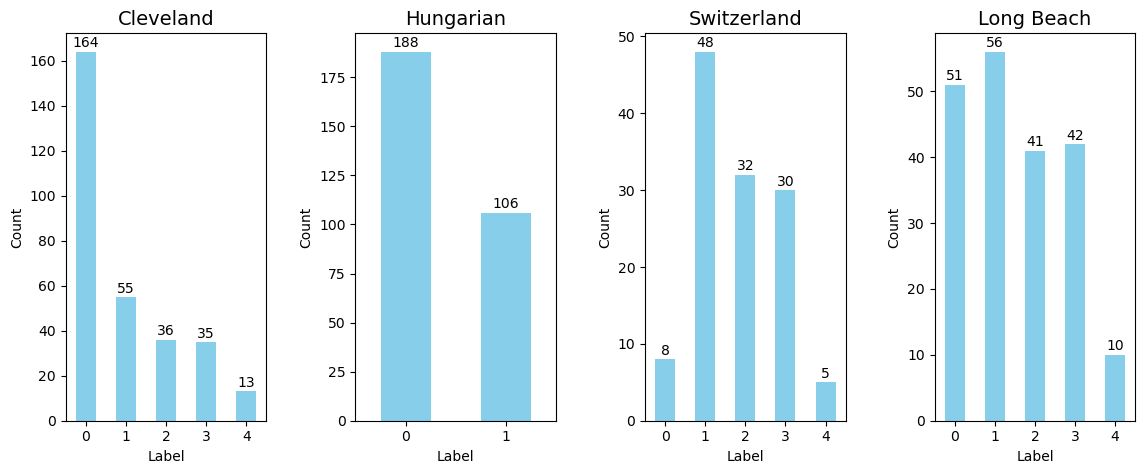

In [21]:
# Plot Label distribution
def plot_label_distribution():
    data_list = [
        cleveland_data['label'].value_counts().sort_index(),
        hungarian_data['label'].value_counts().sort_index(),
        switzerland_data['label'].value_counts().sort_index(),
        longbeach_va_data['label'].value_counts().sort_index()
    ]

    dataset_names = [
        "Cleveland",
        "Hungarian",
        "Switzerland",
        "Long Beach"
    ]
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))
    plt.tight_layout(pad=3.0)

    def show_data_label(ax): 
        for container in ax.containers: 
            ax.bar_label(container,
                         fontsize=10,
                         padding=1)

    for i, data in enumerate(data_list):
        ax = axes[i] 
        
        data.plot(kind='bar', ax=ax, color='skyblue')
        show_data_label(ax)
        ax.set_title(dataset_names[i], fontsize=14)
        ax.set_xlabel("Label")
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', rotation=0)

    plt.show()
    
plot_label_distribution()

##### About Labels
- Except Hungarian dataset others have 5 labels.
- Class 0 meant no cardiovascular disease (CVD) and Classes 1 through 4 represented increasing risk levels.
- To predict only the presence or absence of CVD, not the specific risk level, classes 1, 2, 3, and 4 can be merged into a single class (1).
- **There is huge imbalance in the dataset. This could be problematic.**

In [22]:
# Changing the labels to 0 and 1
def make_binary(dataframes):
    modified_dataframes = [] 
    for df in dataframes: 
        df['label'] = (df['label'] > 0).astype(int)
        modified_dataframes.append(df)
    return tuple(modified_dataframes)

In [23]:
cleveland_data, switzerland_data, longbeach_va_data = make_binary([cleveland_data, switzerland_data, longbeach_va_data])

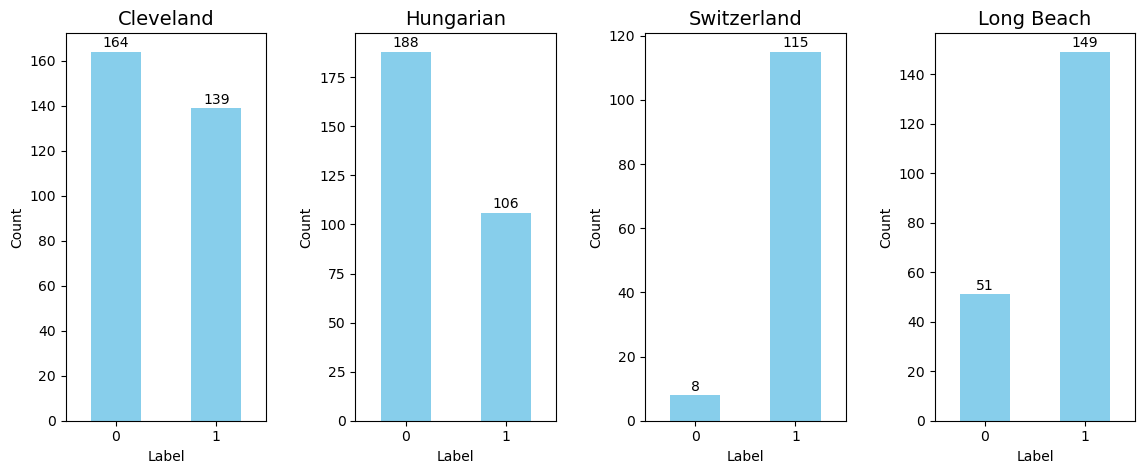

In [24]:
plot_label_distribution()

### Missing Values

In [25]:
def visualize_missing_data(df_name, plot_type='matrix'): 
    df = dataframes[df_name]  
    print(f"Missing data matrix for: {df_name}") 
    if plot_type == 'matrix':
        msno.matrix(df, figsize=(10, 5))
    elif plot_type == 'bar':
        msno.bar(df, figsize=(10, 5))
    else:
        msno.heatmap(df, figsize=(10, 5))
    plt.show() 

dataframes = {
    "Cleveland": cleveland_data,
    "Hungarian": hungarian_data,
    "Switzerland": switzerland_data,
    "Long Beach VA": longbeach_va_data
}

df_dropdown = Dropdown(options=dataframes.keys(), description='Select Dataset:')
df_dropdown_type = Dropdown(options=['matrix', 'bar', 'heatmap'], description='Select Plot:')
interact(visualize_missing_data, df_name=df_dropdown, plot_type=df_dropdown_type)

interactive(children=(Dropdown(description='Select Dataset:', options=('Cleveland', 'Hungarian', 'Switzerland'…

<function __main__.visualize_missing_data(df_name, plot_type='matrix')>

# handling Missing Data

- If a column has less than 50% of its values available (i.e., more than 50% missing)
The column was removed (Attribute Deletion for Missing Value Handling - ADMVH).

- 

#### Imputation Methods

In [26]:
def remove_systematic_missing_columns(df, threshold = 0.5):
    missing_proportions = df.isnull().mean() 
    columns_to_drop = missing_proportions[missing_proportions > threshold].index 
    df_cleaned = df.drop(columns=columns_to_drop, axis=1)
    print(f"Original number of columns: {df.shape[1]}")
    print(f"Columns removed due to >{threshold*100}% missing values: {list(columns_to_drop)}")
    print(f"New number of columns: {df_cleaned.shape[1]}")
    return df_cleaned


def impute_most_common_value(df):
    df_imputed = df.copy() 
    for col in df_imputed.columns: 
        most_common_value = df_imputed[col].mode()[0] 
        df_imputed[col].fillna(most_common_value, inplace=True)
        # also change to numeric 
        df_imputed[col] = pd.to_numeric(df_imputed[col], errors='coerce')
    print("MCMVI Complete.")
    print(f"Total remaining missing values: {df_imputed.isnull().sum().sum()}")
    
        
    return df_imputed

### Cleaveland Dataset

In [27]:
cleveland_data = remove_systematic_missing_columns(cleveland_data)
cleveland_data = impute_most_common_value(cleveland_data)

Original number of columns: 14
Columns removed due to >50.0% missing values: []
New number of columns: 14
MCMVI Complete.
Total remaining missing values: 0


### Hungarian Dataset

In [28]:
hungarian_data = remove_systematic_missing_columns(hungarian_data)
hungarian_data = impute_most_common_value(hungarian_data)

Original number of columns: 14
Columns removed due to >50.0% missing values: ['slope', 'ca', 'thal']
New number of columns: 11
MCMVI Complete.
Total remaining missing values: 0


### Switzerland Dataset

In [29]:
switzerland_data = remove_systematic_missing_columns(switzerland_data)
switzerland_data = impute_most_common_value(switzerland_data) 

Original number of columns: 14
Columns removed due to >50.0% missing values: ['fbs', 'ca']
New number of columns: 12
MCMVI Complete.
Total remaining missing values: 0


### Long Beach VA Dataset

In [30]:
longbeach_va_data = remove_systematic_missing_columns(longbeach_va_data)
longbeach_va_data = impute_most_common_value(longbeach_va_data) 

Original number of columns: 14
Columns removed due to >50.0% missing values: ['slope', 'ca', 'thal']
New number of columns: 11
MCMVI Complete.
Total remaining missing values: 0


# Check Missing Values Missibg Value Imputation

In [31]:
dataframes = {
    "Cleveland": cleveland_data,
    "Hungarian": hungarian_data,
    "Switzerland": switzerland_data,
    "Long Beach VA": longbeach_va_data
}

df_dropdown = Dropdown(options=dataframes.keys(), description='Select Dataset:')
df_dropdown_type = Dropdown(options=['matrix', 'bar', 'heatmap'], description='Select Plot:')
interact(visualize_missing_data, df_name=df_dropdown, plot_type=df_dropdown_type)

interactive(children=(Dropdown(description='Select Dataset:', options=('Cleveland', 'Hungarian', 'Switzerland'…

<function __main__.visualize_missing_data(df_name, plot_type='matrix')>

In [32]:
cleveland_data.to_csv(f'{data_dir}/cleveland.csv', index=False)
hungarian_data.to_csv(f'{data_dir}/hungarian.csv', index=False)
switzerland_data.to_csv(f'{data_dir}/switzerland.csv', index=False)
longbeach_va_data.to_csv(f'{data_dir}/longbeach_va.csv', index=False)